In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()

1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 640x480 with 0 Axes>

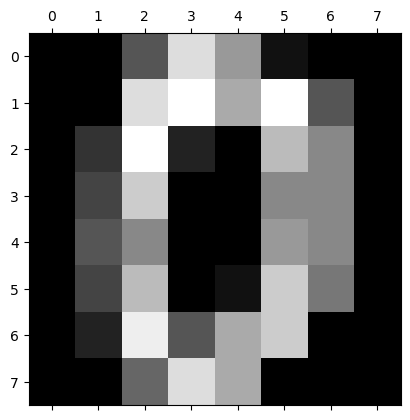

In [2]:
# Create feature and target arrays

x = digits.data
y = digits.target

print(len(x))
print(x[0])
print(digits.images[0])

plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [4]:
# splitting into training and test data sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [7]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

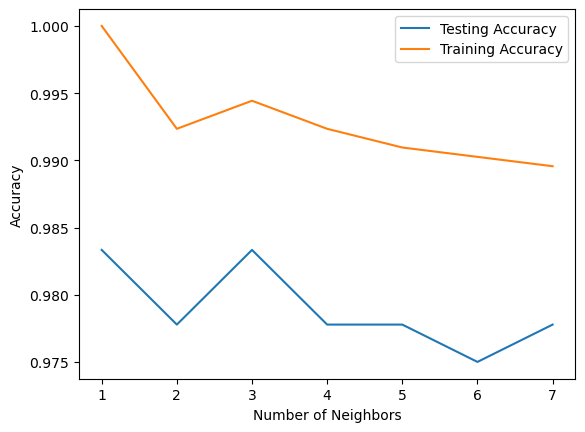

In [8]:
# KNN

number_neighbors = []
testing_scores=[]
training_scores=[]

for i in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    number_neighbors.append(i)
    training_scores.append(knn.score(x_train, y_train))
    testing_scores.append(knn.score(x_test, y_test))

plt.plot(number_neighbors, testing_scores, label = "Testing Accuracy")
plt.plot(number_neighbors, training_scores, label = "Training Accuracy")
plt.legend()

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
# SVM

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    print(kernel)
    print(classification_report(y_test, y_pred))

linear
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        26
           3       0.98      1.00      0.99        42
           4       0.95      1.00      0.97        35
           5       0.97      0.97      0.97        40
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        37
           8       0.97      0.92      0.94        36
           9       0.96      0.89      0.92        27

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

poly
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        26
           3

Text(50.722222222222214, 0.5, 'True Label')

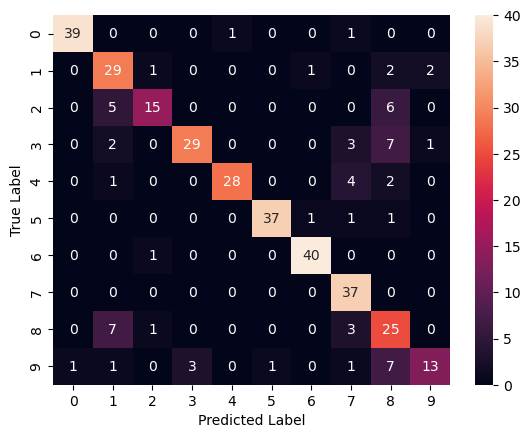

In [10]:
# NaiveBayes

bayes = GaussianNB()
bayes.fit(x_train, y_train)
y_pred = bayes.predict(x_test)
c_mat = confusion_matrix(y_test, y_pred)
a= sns.heatmap(c_mat, annot=True)
a.set_xlabel("Predicted Label")
a.set_ylabel("True Label")

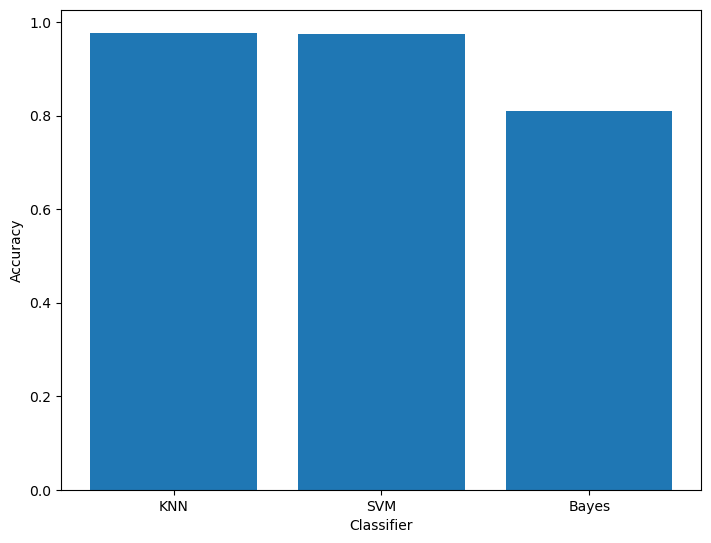

In [11]:
models = []
labels = ["KNN", "SVM", "Bayes"]
classifiers = [KNeighborsClassifier(n_neighbors=2), SVC(kernel = 'linear'), GaussianNB()]

for c in classifiers:
    c.fit(x_train, y_train)
    models.append(c.score(x_test, y_test))
    
f = plt.figure()
a = f.add_axes([0,0,1,1])
a.bar(labels,models)
a.set_xlabel("Classifier")
a.set_ylabel("Accuracy")
plt.show()

In [12]:
# load gapminder dataset for linear regression

gm = pd.read_csv("gapminder.csv")
gm.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

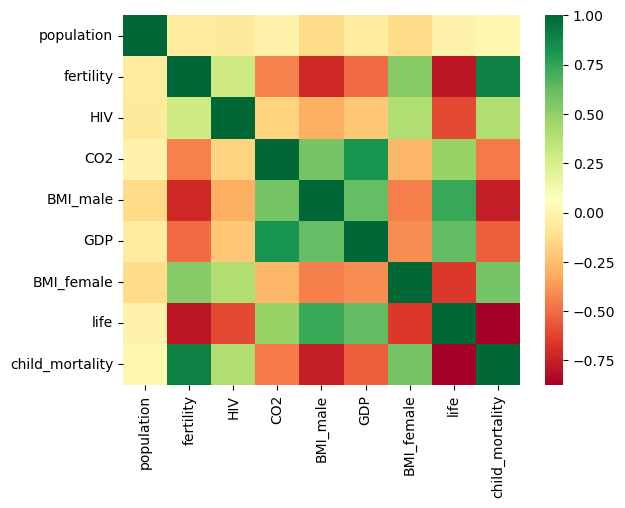

In [13]:
sns.heatmap(gm.corr(), cmap = "RdYlGn")

0.6192442167740035


Text(0, 0.5, 'Life Expectency')

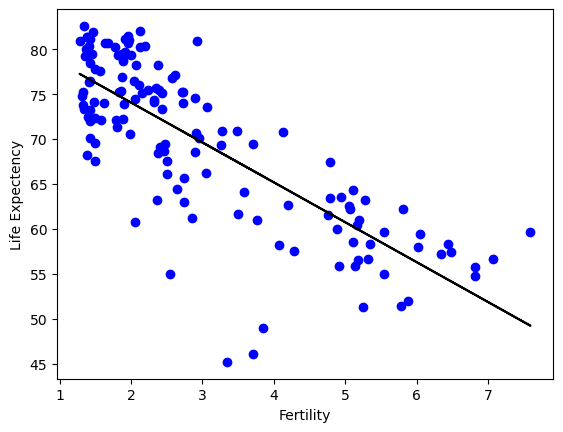

In [14]:
# Linear Regression

x = gm["fertility"]
y = gm["life"]

reg = LinearRegression()
reg.fit(x[:, None], y)
print(reg.score(x[:, None], y))

fig, ax = plt.plot(x,y, 'bo', x, reg.predict(x[:, None]), '-k')
plt.xlabel("Fertility")
plt.ylabel("Life Expectency")


In [15]:
# Linear Regression with all features

x1= gm[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y= gm["life"]

regression_all = LinearRegression()
regression_all.fit(x1,y)
print(regression_all.score(x1,y))

0.8974995317332959


In [16]:
#5-foldcrossvalidation

print(cross_val_score(reg, x[:, None], y, cv=5))
print(cross_val_score(regression_all, x1, y, cv=5))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
[0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


In [17]:
# load credit card dataset for logistic regression

cc = pd.read_csv("creditcard.csv")
print(cc.shape)
cc.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


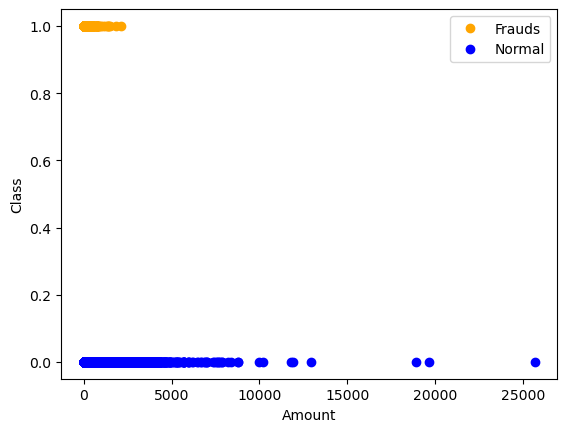

In [61]:
frauds= cc.loc[cc['Class'] == 1]
non_frauds = cc.loc[cc['Class'] == 0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

Text(50.722222222222214, 0.5, 'True label')

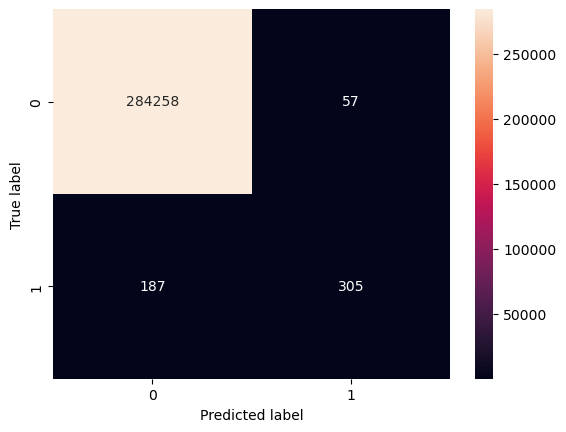

In [19]:
# logistic regression
x = cc.drop("Class", axis=1)
y = cc.Class

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(x,y)
y_pred=log_reg.predict(x)
c_mat = confusion_matrix(y,y_pred)

a = sns.heatmap(c_mat, annot=True, fmt='g')
a.set_xlabel("Predicted label")
a.set_ylabel("True label")